# 決定境界表示サンプルコード

## ライブラリ読み込み・初期設定

In [1]:
# 日本語化ライブラリ導入
!pip install japanize-matplotlib | tail -n 1

In [2]:
# 共通事前処理

# 余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

# 必要ライブラリのimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib日本語化対応
import japanize_matplotlib

# データフレーム表示用関数
from IPython.display import display

# 表示オプション調整
# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14
# 乱数の種
random_seed = 123

## サンプルデータ生成

In [3]:
# サンプルデータの生成

# ライブラリインポート
from sklearn.datasets import make_moons
# 三日月型 (線形分離不可)
X, y = make_moons(noise = 0.05, random_state=random_seed, 
    n_samples=200)

#  学習データの最初の列と２番目の列を抽出
X1 = X[:,0]
X2 = X[:,1]

## サンプルデータの散布図表示

In [4]:
# カラーマップ定義
from matplotlib.colors import ListedColormap
cmap1 = plt.cm.bwr
cmap2 = ListedColormap(['#0000FF', '#000000'])

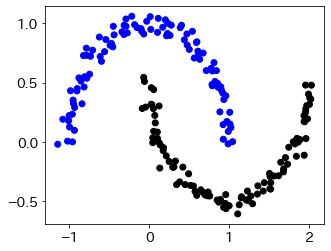

In [5]:
# 散布図表示
plt.figure(figsize=(5,4))
plt.scatter(X1, X2, c=y, cmap=cmap2)
plt.show()

## モデル生成・学習

In [6]:
# モデル生成(アルゴリズム選定)
from sklearn.svm import SVC
algorithm = SVC(kernel='rbf', probability=True, random_state=random_seed)

In [7]:
# 学習
algorithm.fit(X, y)

SVC(probability=True, random_state=123)

## グラフ描画用メッシュ生成

In [8]:
# グラフ描画用メッシュ生成

# メッシュの刻み幅
h = 0.005

# それぞれの最小値と最大値を計算
f1_min, f1_max = X1.min(), X1.max()
f2_min, f2_max = X2.min(), X2.max()

# 最小値と最大値の間を刻み幅で等間隔に区切る
f1_range = np.arange(f1_min, f1_max+h, h)
f2_range = np.arange(f2_min, f2_max+h, h)

# 上の結果を基にメッシュ配列の生成
f1, f2 = np.meshgrid(f1_range, f2_range)

# 結果の一部確認
print(f1[0,:5])
print(f2[0,:5])

[-1.14500246 -1.14000246 -1.13500246 -1.13000246 -1.12500246]
[-0.6067159 -0.6067159 -0.6067159 -0.6067159 -0.6067159]


## モデル入力用変数生成

In [9]:
# モデル入力用変数生成
# f1, f2からN行2列のNumPy配列を生成する

w = np.c_[f1.ravel(), f2.ravel()]
print(w.shape)
print(w[:,:10])

(212424, 2)
[[-1.14500246 -0.6067159 ]
 [-1.14000246 -0.6067159 ]
 [-1.13500246 -0.6067159 ]
 ...
 [ 2.01999754  1.0582841 ]
 [ 2.02499754  1.0582841 ]
 [ 2.02999754  1.0582841 ]]


## 予測(確率値取得)

In [10]:
# 予測(確率値取得)
#　  (予測値0に対する確率値は捨てる)
Z = algorithm.predict_proba(w)[:,1]

# 結果を２次元メッシュ状に戻す
W = Z.reshape(f1.shape)

# 各変数のshape確認
print(Z.shape)
print(W.shape)
print(f1.shape)

(212424,)
(334, 636)
(334, 636)


## contourf関数を用いて等高線表示

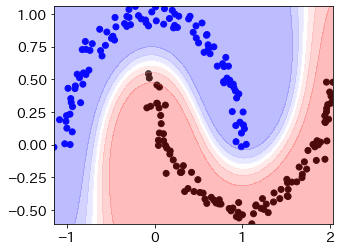

In [11]:
# contourf関数を用いて等高線表示
plt.figure(figsize=(5,4))
plt.scatter(X1, X2, c=y, cmap=cmap2)
plt.contourf(f1, f2, W, cmap=cmap1, alpha=0.3)
plt.show()

## contour関数を用いて決定境界表示

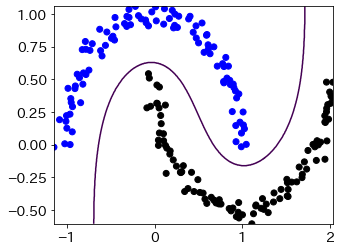

In [12]:
# contour関数を用いて決定境界表示
# 確率値で見たとき、決定境界とは確率値が0.5の点をつないだ曲線
plt.figure(figsize=(5,4))
plt.scatter(X1, X2, c=y, cmap=cmap2)
plt.contour(f1, f2, W, levels=[0.5], linewidth=2)
plt.show()

## contour関数を用いて複数の境界表示

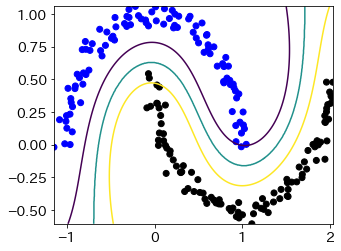

In [13]:
# contour関数を用いて複数の境界表示
#　等高線の値を複数与えることも可能
plt.figure(figsize=(5,4))
plt.scatter(X1, X2, c=y, cmap=cmap2)
plt.contour(f1, f2, W, levels=[0.1,0.5,0.9], linewidth=2)
plt.show()

## contourf関数とcontour関数を同時に利用

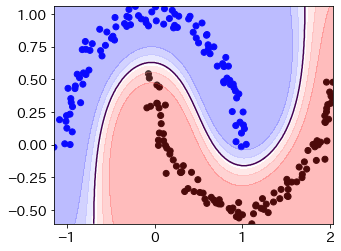

In [14]:
# contourf関数とcontour関数を同時に利用
plt.figure(figsize=(5,4))
plt.scatter(X1, X2, c=y, cmap=cmap2)
plt.contourf(f1, f2, W, cmap=cmap1, alpha=0.3)
plt.contour(f1, f2, W, levels=[0.5], linewidth=2)
plt.show()

## 確率値を３次元曲面表示

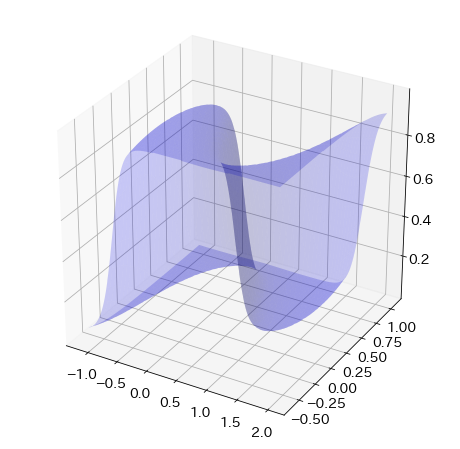

In [15]:
# 確率値を３次元曲面表示
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(8,8))
ax = plt.subplot(1, 1, 1, projection='3d')
ax.plot_surface(f1, f2, W, color='blue', 
    rstride=10, cstride=10, alpha=0.2)
plt.show()

# 決定境界表示関数

## 関数定義

In [16]:
#　決定境界表示関数
def show_boundary(X, y, algorithm, h=0.005):
    X1 = X[:,0]
    X2 = X[:,1]
    f1_min, f1_max = X1.min(), X1.max()
    f2_min, f2_max = X2.min(), X2.max()
    f1_range = np.arange(f1_min, f1_max+h, h)
    f2_range = np.arange(f2_min, f2_max+h, h)
    f1, f2 = np.meshgrid(f1_range, f2_range)
    w = np.c_[f1.ravel(), f2.ravel()]
    Z = algorithm.predict_proba(w)[:,1]
    W = Z.reshape(f1.shape)

    # グラフ描画
    from matplotlib.colors import ListedColormap
    cmap1 = plt.cm.bwr
    cmap2 = ListedColormap(['#0000FF', '#000000'])
    plt.figure(figsize=(5,4))
    plt.scatter(X1, X2, c=y, cmap=cmap2)
    plt.contourf(f1, f2, W, cmap=cmap1, alpha=0.3)
    plt.contour(f1, f2, W, levels=[0.5], linewidth=2)
    plt.show()

## 利用サンプル

In [17]:
# サンプルデータの生成

# ライブラリインポート
from sklearn.datasets import make_moons
# 三日月型 (線形分離不可)
X, y = make_moons(noise = 0.05, random_state=random_seed, 
    n_samples=200)

In [18]:
# モデル生成(アルゴリズム選定)
from sklearn.svm import SVC
algorithm = SVC(kernel='rbf', probability=True, random_state=random_seed)

# 学習
algorithm.fit(X, y)

SVC(probability=True, random_state=123)

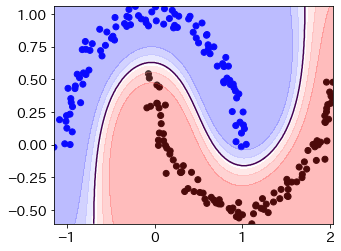

In [19]:
show_boundary(X, y, algorithm)

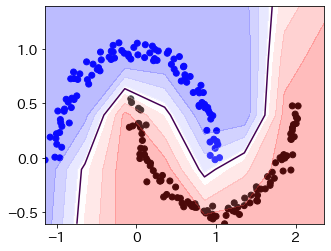

In [20]:
show_boundary(X, y, algorithm, h=0.5)

# おまけ　書籍「Pythonで儲かるＡＩをつくる」修正コード

## 簡易修正版(どの場合も決定境界が標示される)

In [21]:
# 簡易修正版(どの場合も決定境界が標示される)
from sklearn.model_selection import train_test_split

# 決定境界の表示関数
def plot_boundary(ax, x, y, algorithm):
    x_train, x_test, y_train, y_test = train_test_split(x, y,
            test_size=0.5, random_state=random_seed)
    # カラーマップ定義
    from matplotlib.colors import ListedColormap
    cmap1 = plt.cm.bwr
    cmap2 = ListedColormap(['#0000FF', '#000000'])

    h = 0.005
    algorithm.fit(x_train, y_train)
    score_test = algorithm.score(x_test, y_test)
    score_train = algorithm.score(x_train, y_train)
    f1_min = x[:, 0].min() - 0.5
    f1_max = x[:, 0].max() + 0.5
    f2_min = x[:, 1].min() - 0.5
    f2_max = x[:, 1].max() + 0.5
    f1, f2 = np.meshgrid(np.arange(f1_min, f1_max, h), 
                         np.arange(f2_min, f2_max, h))
    if hasattr(algorithm, "decision_function"):
        Z = algorithm.decision_function(np.c_[f1.ravel(), f2.ravel()])
        Z = Z.reshape(f1.shape)
        ax.contour(f1, f2, Z, levels=[0], linewidth=2)
    else:
        Z = algorithm.predict_proba(np.c_[f1.ravel(), f2.ravel()])[:, 1]
        Z = Z.reshape(f1.shape)
        # この下の行を追加
        ax.contour(f1, f2, Z, levels=[0.5], linewidth=2)

    ax.contourf(f1, f2, Z, cmap=cmap1, alpha=0.3)
    ax.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=cmap2)
    ax.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=cmap2, marker='x')
    text = f'検証:{score_test:.2f}  訓練: {score_train:.2f}'
    ax.text(f1.max() - 0.3, f2.min() + 0.3, text, horizontalalignment='right',
    fontsize=18) 


 ## 抜本修正版(どのケースもpredict_proba関数を使うことで実装をシンプルに)

In [22]:
# 抜本修正版
# predict_proba関数のみ使うように」して実装をシンプルに
# メッシュ計算のロジックもきれいに修正
# 精度はタイトルで表示するように修正
from sklearn.model_selection import train_test_split

# 決定境界の表示関数
def plot_boundary(ax, x, y, algorithm):
    x_train, x_test, y_train, y_test = train_test_split(x, y,
            test_size=0.5, random_state=random_seed)
    # カラーマップ定義
    from matplotlib.colors import ListedColormap
    cmap1 = plt.cm.bwr
    cmap2 = ListedColormap(['#0000FF', '#000000'])
    h = 0.005
    algorithm.fit(x_train, y_train)
    score_test = algorithm.score(x_test, y_test)
    score_train = algorithm.score(x_train, y_train)
    x1, x2 = x[:,0], x[:,1]
    f1_min, f1_max = x1.min(), x1.max()
    f2_min, f2_max = x2.min(), x2.max()
    f1, f2 = np.meshgrid(np.arange(f1_min, f1_max+h, h), 
        np.arange(f2_min, f2_max+h, h))
    Z = algorithm.predict_proba(np.c_[f1.ravel(), f2.ravel()])[:,1]
    Z = Z.reshape(f1.shape)
    ax.contour(f1, f2, Z, levels=[0.5], linewidth=2)
    ax.contourf(f1, f2, Z, cmap=cmap1, alpha=0.3)
    ax.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=cmap2)
    ax.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=cmap2, marker='x')
    text = f'検証:{score_test:.2f}  訓練: {score_train:.2f}'
    ax.set_title(text)